### Testing the Environment

In [95]:
# Testing the environment

import cv2
import numpy as np
import tensorflow as tf
import dlib

print("OpenCV version", cv2.__version__)

print("Numpy version", np.__version__)

print("Tensorflow version", tf.__version__)


OpenCV version 3.2.0-dev
Numpy version 1.13.1
Tensorflow version 1.3.0


In [110]:
from collections import OrderedDict

PATH = os.path.join("..","..","dependencies")
FILE_NAME = "shape_predictor_68_face_landmarks.dat"

predictor = dlib.shape_predictor(os.path.join(PATH,FILE_NAME))

detector = dlib.get_frontal_face_detector()

def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)

    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)

    # return the list of (x, y)-coordinates
    return coords

In [151]:
from enum import Enum

class Effect(Enum):
    GLASSES = 1
    MUSTACHE = 2
    WIG = 3
    BEARD = 4

In [164]:
def add_ar_effect(frame, shape, option):
    if option == Effect.GLASSES:
        frame = show_sunglass(frame,shape)
    elif option == Effect.MUSTACHE:
        frame = show_mustache(frame,shape)
    elif option == Effect.WIG:
        frame = show_wig(frame,shape)
    elif option == Effect.BEARD:
        frame = show_beard(frame,shape)
    return frame

In [130]:
def show_sunglass(frame,shape):
    px1,py1   = shape[0]
    px20,py20 = shape[20]
    px17,py17 = shape[17]
    px30,py30 = shape[30]
    
    glasses = cv2.imread(os.path.join(IMG_SRC, "Sunglass.png"))
    
    prop_height = py30 - py20
    prop_width  = px17 - px1
    
    # reshaping the glasses 
    glasses = cv2.resize(glasses, (prop_height,prop_width))
    glasses = glasses[:,:,:3]
    
    
    frame[py20:py20+glasses.shape[0],py1:py1+glasses.shape[1]] = glasses
    
    print("Shown sunglasses")
    
    return frame

In [ ]:
def show_beard(frame,shape):
    px1,py1   = shape[0]
    px20,py20 = shape[20]
    px17,py17 = shape[17]
    px30,py30 = shape[30]
    
    glasses = cv2.imread(os.path.join(IMG_SRC, "Sunglass.png"))
    
    prop_height = py30 - py20
    prop_width  = px17 - px1
    
    # reshaping the glasses 
    glasses = cv2.resize(glasses, (prop_height,prop_width))
    glasses = glasses[:,:,:3]
    
    frame[py20:py20+glasses.shape[0],py1:py1+glasses.shape[1]] = glasses
    
    print("Shown sunglasses")
    
    return frame

In [ ]:
def show_wig(frame,shape):
    px1,py1   = shape[0]
    px20,py20 = shape[20]
    px17,py17 = shape[17]
    px30,py30 = shape[30]
    
    glasses = cv2.imread(os.path.join(IMG_SRC, "Sunglass.png"))
    
    prop_height = py30 - py20
    prop_width  = px17 - px1
    
    # reshaping the glasses 
    glasses = cv2.resize(glasses, (prop_height,prop_width))
    glasses = glasses[:,:,:3]
    
    
    frame[py20:py20+glasses.shape[0],py1:py1+glasses.shape[1]] = glasses
    
    print("Shown sunglasses")
    
    return frame

In [ ]:
def show_mustache(frame,shape):
    px1,py1   = shape[0]
    px20,py20 = shape[20]
    px17,py17 = shape[17]
    px30,py30 = shape[30]
    
    glasses = cv2.imread(os.path.join(IMG_SRC, "Sunglass.png"))
    
    prop_height = py30 - py20
    prop_width  = px17 - px1
    
    # reshaping the glasses 
    glasses = cv2.resize(glasses, (prop_height,prop_width))
    glasses = glasses[:,:,:3]
    
    
    frame[py20:py20+glasses.shape[0],py1:py1+glasses.shape[1]] = glasses
    
    print("Shown sunglasses")
    
    return frame

In [163]:
def show_sunglass(frame,shape):
    IMG_SRC = os.path.join("..","images","Markerless_AR")
    frame   = cv2.imread(os.path.join(IMG_SRC,"dj_glasses.png"))
    frame   = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    return frame
    
def show_mustache(frame,shape):
    IMG_SRC = os.path.join("..","images","Markerless_AR")
    frame   = cv2.imread(os.path.join(IMG_SRC,"dj_mustache.png"))
    frame   = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    return frame
    
def show_wig(frame,shape):
    IMG_SRC = os.path.join("..","images","Markerless_AR")
    frame   = cv2.imread(os.path.join(IMG_SRC,"dj_hair.png"))
    frame   = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    return frame
    
def show_beard(frame,shape):
    IMG_SRC = os.path.join("..","images","Markerless_AR")
    frame   = cv2.imread(os.path.join(IMG_SRC,"dj_beard.png"))
    frame   = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    return frame


In [131]:
option = Effect.GLASSES

In [170]:
# Real-Time Facial Landmark in Videos

def process_image(frame,option):
    
    dets = detector(frame)

    for k, d in enumerate(dets): 

            gray = cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)     

            shape = predictor(gray, d)

            shape = shape_to_np(shape)

            for (x, y) in shape:
                    cv2.circle(frame, (x, y), 5, (0, 0, 255), -1)
                       
    return frame

In [172]:
# Real-Time Facial Landmark in Videos

def process_image(frame,option):
    
    dets = detector(frame)

    for k, d in enumerate(dets): 

            gray = cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)     

            shape = predictor(gray, d)

            shape = shape_to_np(shape)

            for (x, y) in shape:
                    cv2.circle(frame, (x, y), 5, (0, 0, 255), -1)
        
            frame = add_ar_effect(frame, shape, option)
                       
    return frame

### Loading an input image

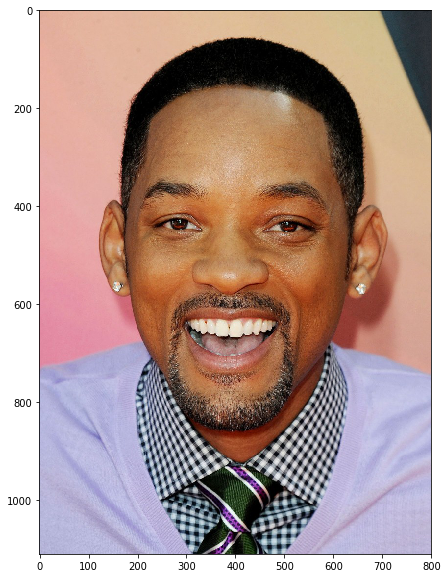

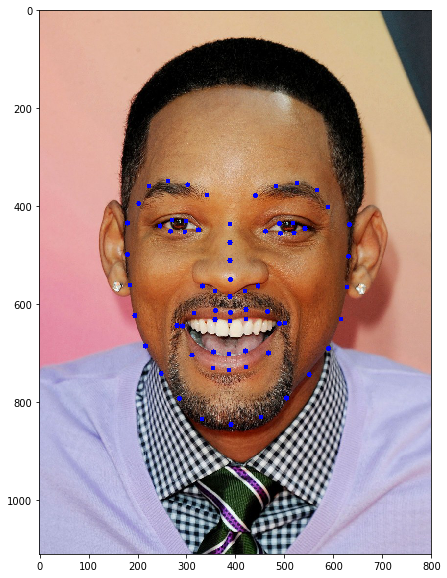

In [171]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

%matplotlib inline

IMG_SRC = os.path.join("..","images","Markerless_AR")

image   = cv2.imread(os.path.join(IMG_SRC,"Will_Smith.jpg"))
image  = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure("Will Smith",(10,10))
plt.imshow(image)
plt.show()

plt.figure("Landmarks",(10,10))
plt.imshow(process_image(image,None))
plt.show()

In [22]:
# Real-Time Facial Landmark in Videos 

def process_image(frame):
    
    #Image Space Landmarks
    FACIAL_LANDMARKS = OrderedDict([
        ("nose_tip"   , 34),
        ("chin"       , 8 ),
        ("left_eye"   , 37),
        ("right_eye"  , 46),
        ("left_mouth" , 61),
        ("right_mouth", 65)
    ])

    
    size = frame.shape
    
    dets = detector(frame)
    
    image_points = []

    for k, d in enumerate(dets): 

            gray = cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)     

            shape = predictor(gray, d)

            shape = shape_to_np(shape)
            
            for name in FACIAL_LANDMARKS.keys(): #looping through designated landmarks in image space and map to obj space
                lmark = FACIAL_LANDMARKS[name]
                x,y = shape[lmark]
                image_points.append((x,y))
                cv2.circle(frame, (x, y), 1, (0, 0, 255), -1)
    
    if(len(image_points) < 4):
        return frame
    
    image_points = np.array(image_points,dtype="double")
    
    object_points = np.array([
                                        (0.0, 0.0, 0.0),             # Nose tip
                                        (0.0, -330.0, -65.0),        # Chin
                                        (-225.0, 170.0, -135.0),     # Left eye left corner
                                        (225.0, 170.0, -135.0),      # Right eye right corne
                                        (-150.0, -150.0, -125.0),    # Left Mouth corner
                                        (150.0, -150.0, -125.0)      # Right mouth corner

                                    ])

    # Camera internals

    focal_length = size[1]
    center = (size[1]/2, size[0]/2)
    camera_matrix = np.array(
                                     [[focal_length, 0, center[0]],
                                     [0, focal_length, center[1]],
                                     [0, 0, 1]], dtype = "double"
                                     )
        
    dist_coeffs = np.zeros((4,1)) # Assuming no lens distortion
    (success, rotation_vector, translation_vector) = cv2.solvePnP(object_points, image_points, camera_matrix, dist_coeffs, flags=cv2.SOLVEPNP_ITERATIVE)

    (nose_end_point2D, jacobian) = cv2.projectPoints(np.array([(0.0, 0.0, 1000.0)]), rotation_vector, translation_vector, camera_matrix, dist_coeffs)

    p1 = ( int(image_points[0][0]), int(image_points[0][1]))
    p2 = ( int(nose_end_point2D[0][0][0]), int(nose_end_point2D[0][0][1]))

    cv2.line(frame, p1, p2, (255,0,0), 2)
    
    
    return frame

In [23]:
# Installing ffmpeg for playing video's in notebook
import imageio

imageio.plugins.ffmpeg.download()

In [24]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import os

INPUT_VIDEO  = os.path.join("..","..","Section2_EmotionDetection","images","videos","Seth_Meyers.mp4")
OUTPUT_VIDEO = os.path.join("..","..","Section2_AndroidPanorama","images","videos","Seth_Meyers_Processed.mp4") 

input_video = VideoFileClip(INPUT_VIDEO).subclip(0,30)
input_clip = input_video.fl_image(process_image)
%time input_clip.write_videofile(OUTPUT_VIDEO, audio=False)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(OUTPUT_VIDEO))

[MoviePy] >>>> Building video ../../Section2_EmotionDetection/images/videos/Seth_Meyers_Processed.mp4
[MoviePy] Writing video ../../Section2_EmotionDetection/images/videos/Seth_Meyers_Processed.mp4



 34%|███▍      | 309/900 [00:49<01:34,  6.23it/s]


 69%|██████▊   | 617/900 [01:37<00:45,  6.26it/s]


100%|██████████| 900/900 [02:23<00:00,  6.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ../../Section2_EmotionDetection/images/videos/Seth_Meyers_Processed.mp4 

CPU times: user 2min 16s, sys: 1.04 s, total: 2min 17s
Wall time: 2min 23s


HBox(children=(Button(description='Glasses', style=ButtonStyle()), Button(description='Mustache', style=ButtonStyle()), Button(description='Wig', style=ButtonStyle()), Button(description='Beard', style=ButtonStyle())))

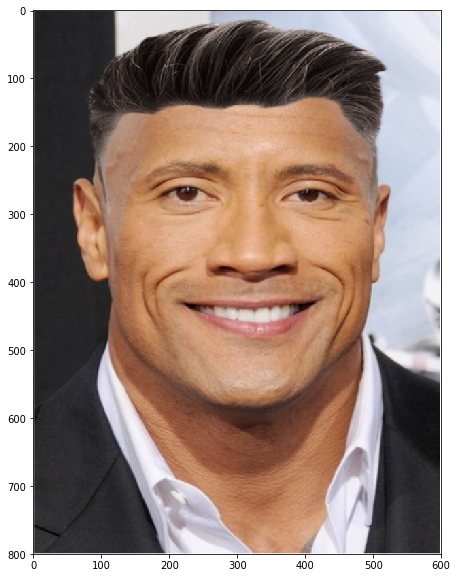

In [176]:
# from IPython.display import display
from IPython.display import clear_output
import matplotlib.image as mpimg
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display
from IPython.html import widgets

%matplotlib inline

from ipywidgets import widgets

IMG_SRC = os.path.join("..","images","Markerless_AR")

image   = cv2.imread(os.path.join(IMG_SRC,"Dyane_Johnson.jpg"))
    
def render_glasses(e):
    clear_output(wait=True)
    img = process_image(image,Effect.GLASSES)
    img = cv2.resize(img, (600,800))
    display(widgets.HBox((gl_btn, mt_btn, wg_btn, bd_btn)))
    plt.figure("",(10,10))
    plt.imshow(img)
    plt.show()
    
def render_mustache(e):
    clear_output(wait=True)
    img = process_image(image,Effect.MUSTACHE)
    img = cv2.resize(img, (600,800))
    display(widgets.HBox((gl_btn, mt_btn, wg_btn, bd_btn)))
    plt.figure("",(10,10))
    plt.imshow(img)
    plt.show()
    
def render_wig(e):
    clear_output(wait=True)
    img = process_image(image,Effect.WIG)
    img = cv2.resize(img, (600,800))
    display(widgets.HBox((gl_btn, mt_btn, wg_btn, bd_btn)))
    plt.figure("",(10,10))
    plt.imshow(img)
    plt.show()
 
def render_beard(e):
    clear_output(wait=True)
    img = process_image(image,Effect.BEARD)
    img = cv2.resize(img, (600,800))
    display(widgets.HBox((gl_btn, mt_btn, wg_btn, bd_btn)))
    plt.figure("",(10,10))
    plt.imshow(img)
    plt.show()
    
gl_btn = widgets.Button(description = 'Glasses')
mt_btn = widgets.Button(description = 'Mustache')
wg_btn = widgets.Button(description = 'Wig')
bd_btn = widgets.Button(description = 'Beard')


gl_btn.on_click(render_glasses)
mt_btn.on_click(render_mustache)
wg_btn.on_click(render_wig)
bd_btn.on_click(render_beard)

display(widgets.HBox((gl_btn, mt_btn, wg_btn, bd_btn)))